# **Radar Experience 1**

In [67]:
import numpy as np
import pyart
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import MultipleLocator

# plotting set up
plt.rcParams['axes.labelweight'] = 'normal'
plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'
rc('font', family='sans-serif')
rc('font', weight='normal', size=15)
rc('figure', facecolor='white')

### <u>Question 3</u>: 
### Work with the instructor to set up the radar scanning parameters and operate the system. Take several pictures of the radar computer that shows PPI plots of reflectivity factor, radial velocity, and polarimetric parameters. Describe any interesting meteorological conditions or non-meteorological targets.

In [68]:
radar = pyart.io.read("/Users/robbyfrost/Documents/Classes/Radar_Theory/RE1/RaXPol_RE1/RAXPOL-20250915-162416-E2.0.nc")
radar.fields.keys()
radar.metadata['instrument_name'] = 'RaXPol'

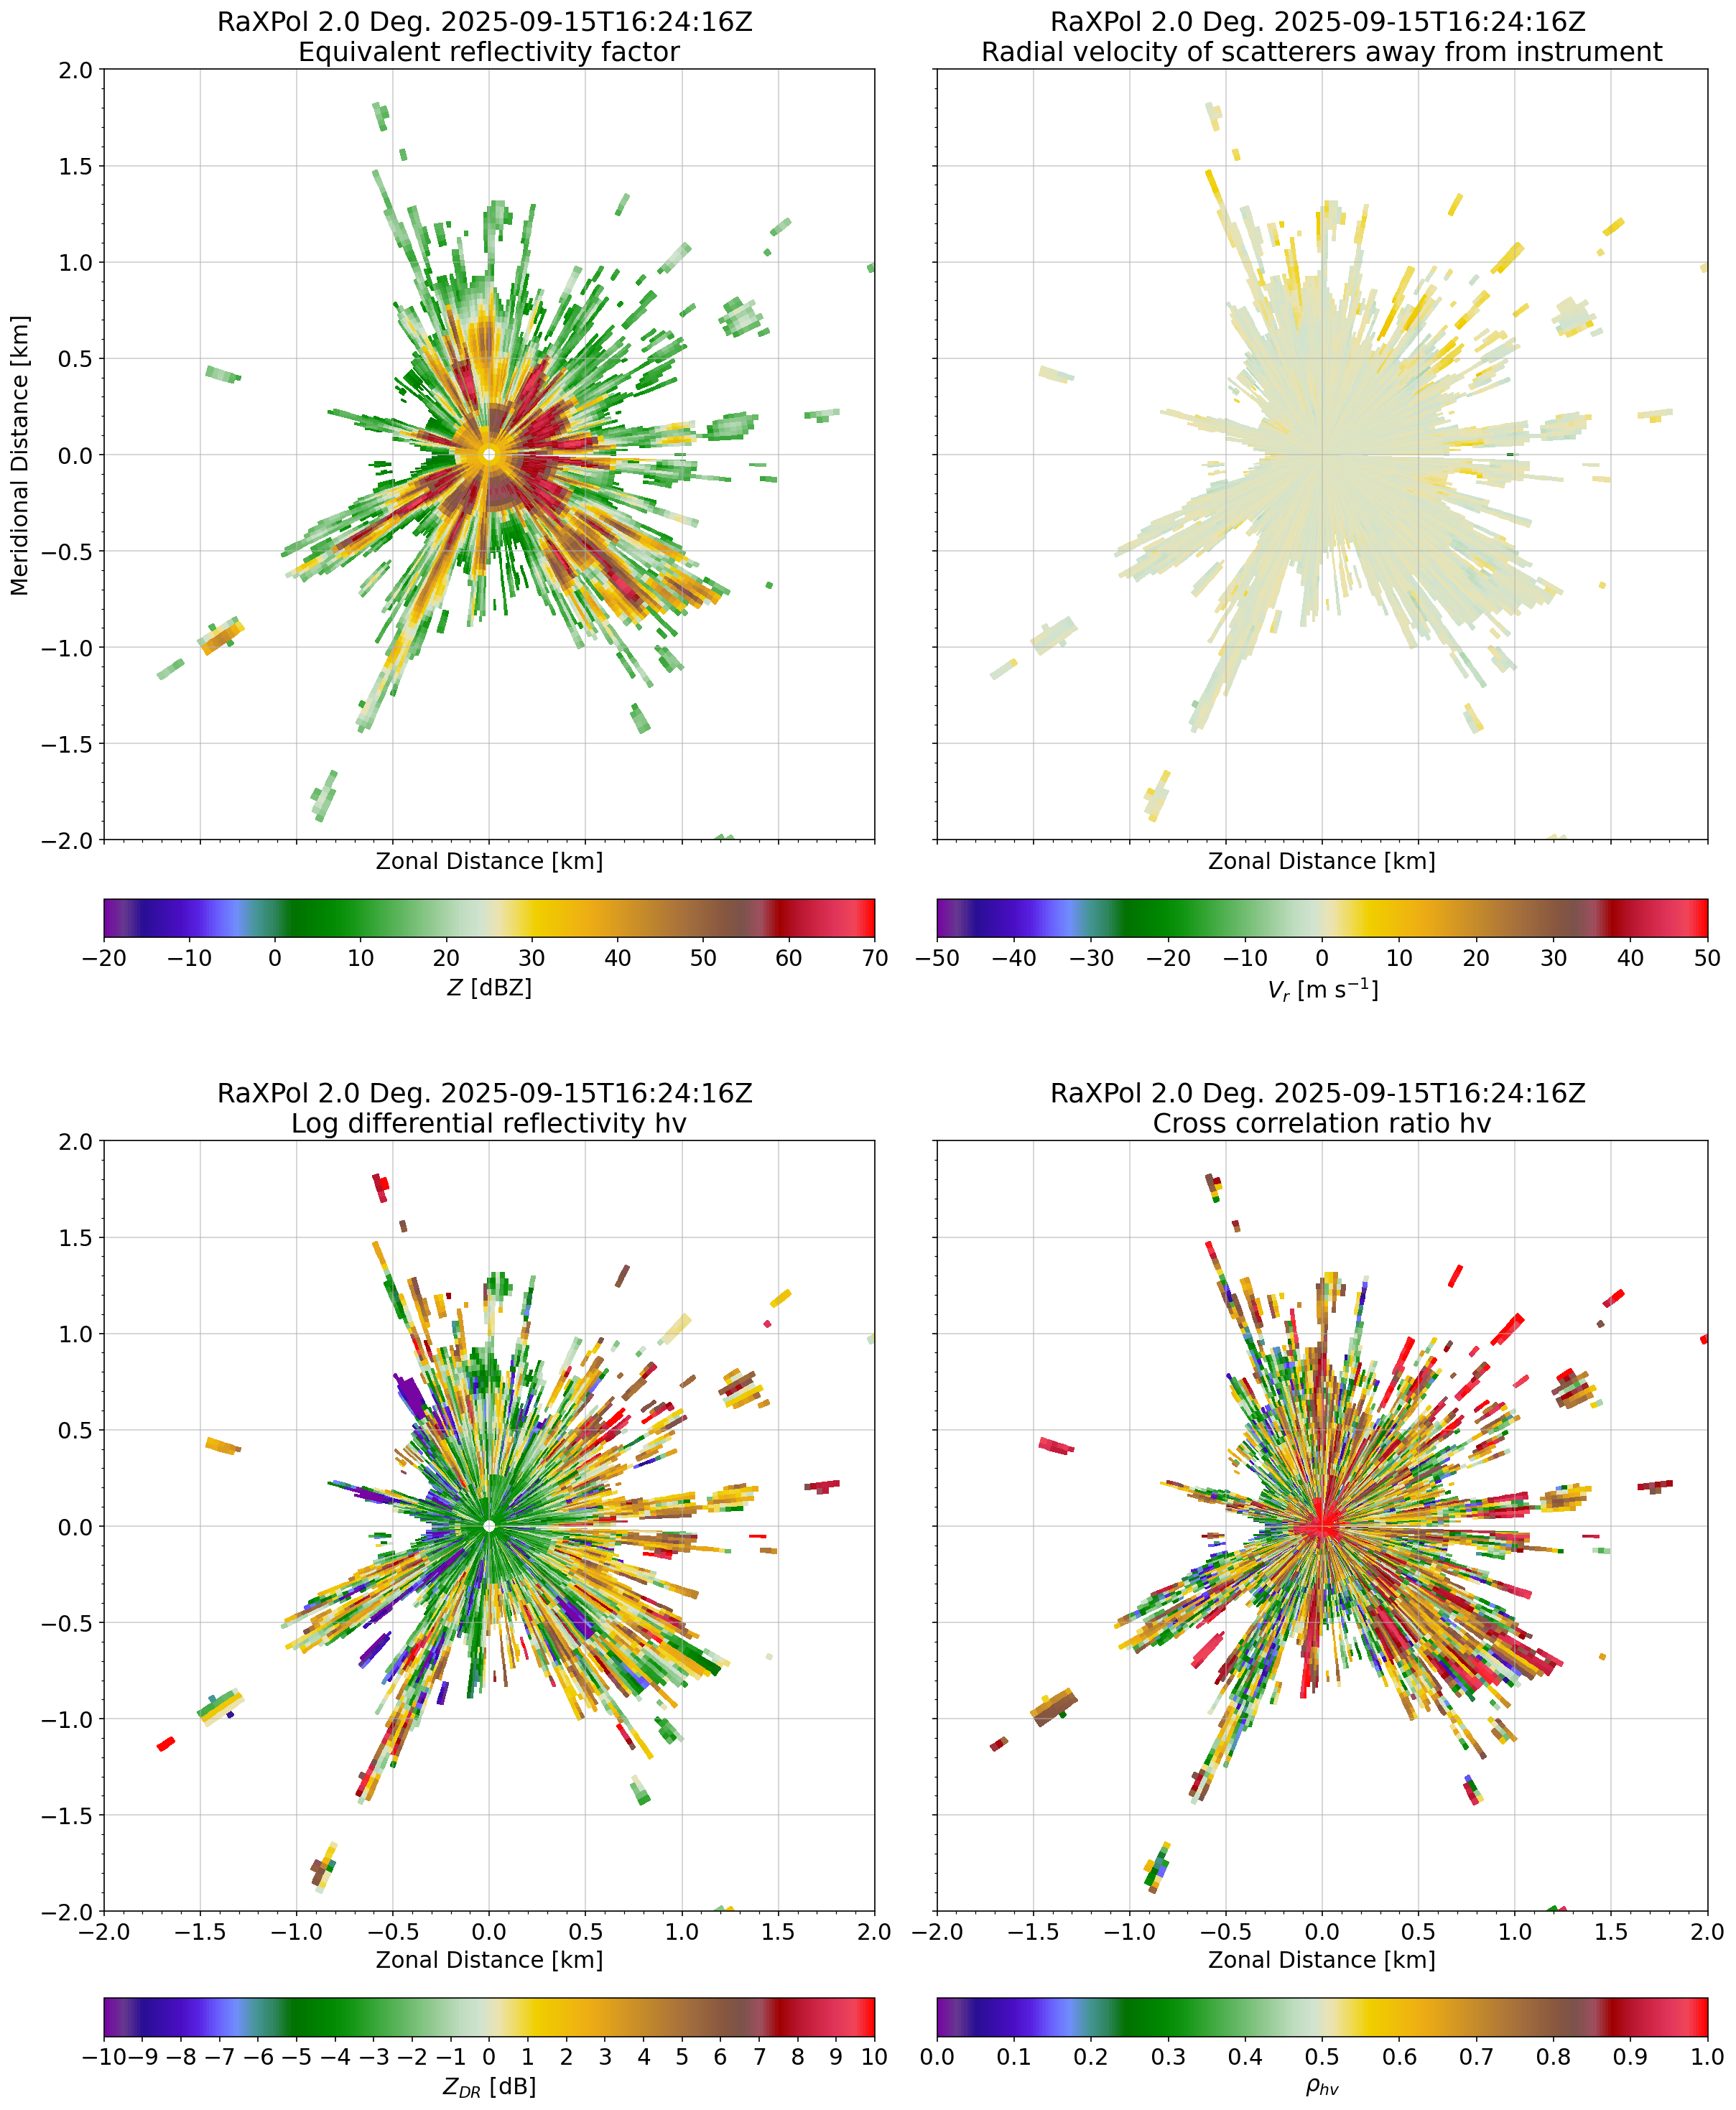

In [69]:
swp = 0
# make figure
display = pyart.graph.RadarDisplay(radar.extract_sweeps([swp]))
fig, axs = plt.subplots(figsize=(16,20), 
                        ncols=2, nrows=2,
                        sharey=True, sharex=True,
                        constrained_layout=True,
                        dpi=150)
# reflectivity
ax = axs[0,0]
vmin, vmax = -20, 70
display.plot_ppi('DBZ', ax=ax, 
                vmin=vmin, vmax=vmax,
                cmap="Carbone42",
                colorbar_flag=False,
                title_use_sweep_time=True,
                axislabels_flag=False)
cbar0 = fig.colorbar(display.plots[0], ax=ax, orientation='horizontal', pad=0.025)
cbar0.set_label("$Z$ [dBZ]")
cbar0.set_ticks(np.arange(vmin, vmax + 0.001, 10))
ax.set_ylabel("Meridional Distance [km]")
# radial velocity
ax = axs[0,1]
vmin, vmax = -50, 50
display.plot_ppi('VEL', ax=ax, 
                vmin=vmin, vmax=vmax,
                cmap="Carbone42",
                colorbar_flag=False,
                title_use_sweep_time=True,
                axislabels_flag=False)
cbar1 = fig.colorbar(display.plots[1], ax=ax, orientation='horizontal', pad=0.025)
cbar1.set_label("$V_r$ [m s$^{-1}$]")
cbar1.set_ticks(np.arange(vmin, vmax + 0.001, 10))
# differential reflectivity
ax = axs[1,0]
vmin, vmax = -10, 10
display.plot_ppi('ZDR', ax=ax, 
                vmin=vmin, vmax=vmax,
                cmap="Carbone42",
                colorbar_flag=False,
                title_use_sweep_time=True,
                axislabels_flag=False)
cbar2 = fig.colorbar(display.plots[2], ax=ax, orientation='horizontal', pad=0.025)
cbar2.set_label("$Z_{DR}$ [dB]")
cbar2.set_ticks(np.arange(vmin, vmax + 0.001, 1))
# cross correlation ratio
ax = axs[1,1]
vmin, vmax = 0, 1
display.plot_ppi('RHOHV', ax=ax, 
                vmin=vmin, vmax=vmax,
                cmap="Carbone42",
                colorbar_flag=False,
                title_use_sweep_time=True,
                axislabels_flag=False)
cbar3 = fig.colorbar(display.plots[3], ax=ax, orientation='horizontal', pad=0.025)
cbar3.set_label("$\\rho_{hv}$")
cbar3.set_ticks(np.arange(vmin, vmax + 0.001, 0.1))
# clean up plot
for iax in axs.flatten():
    iax.set_aspect('equal')
    iax.set_xlim(-2.,2.)
    iax.xaxis.set_major_locator(MultipleLocator(0.5))
    iax.xaxis.set_minor_locator(MultipleLocator(0.1))
    iax.set_xlabel("Zonal Distance [km]")
    iax.set_ylim(-2.,2.)
    iax.yaxis.set_major_locator(MultipleLocator(0.5))
    iax.yaxis.set_minor_locator(MultipleLocator(0.1))
    iax.grid(alpha=0.6)

### <u>Question 4:</u>

### What PRT did you use for your data? What is the corresponding aliasing velocity and range? Note: we will cover in class this week, and you can figure it out from the PRT and wavelength.

In [70]:
PRT = radar.instrument_parameters['prt']['data'][-1]
print(f"PRT = {PRT*1e3} ms")
PRF = 1/PRT
print(f"PRF = {round(PRF,0)} Hz")

PRT = 0.25 ms
PRF = 4000.0 Hz


In [71]:
nyq = 0.03 / (4*PRT)
print(f"Nyquist velocity = {int(round(nyq))} m/s")
c = 3*10**8
ra = (c*PRT) / 2
print(f"Max unambiguous range = {int(round(ra))/1e3} km")

Nyquist velocity = 30 m/s
Max unambiguous range = 37.5 km


### <u>Question 5:</u>
### How many range gates did you use? What range coverage does this correspond to?

In [72]:
r = radar.range['data']
nr = r.size
dr = r[1] - r[0]
print(f"Number of range gates = {nr}. \nRange resolution = {dr} m. \nCorresponding range coverage = {round(dr*nr/1e3)} km.")

Number of range gates = 1242. 
Range resolution = 30.0 m. 
Corresponding range coverage = 37 km.


### <u>Question 6:</u>
### What pulse length did you use? What is the corresponding range resolution? What is the range sampling and how is this different from range resolution?

In [73]:
pw = radar.instrument_parameters['pulse_width']['data'][-1]
print(f"Pulse width = {pw*1e6} microseconds")
delr = (c*pw)/2
print(f"Range resolution = {delr} m")

Pulse width = 1.0 microseconds
Range resolution = 150.0 m


### <u>Question 7:</u>
### What antenna rotation rate did you choose? How many pulses per degree of azimuth does this provide?

In [74]:
az = radar.azimuth['data']
daz = np.nanmean(np.abs(az[1:]-az[:-1]))
t = radar.time['data']
dt = np.nanmean(np.abs(t[1:]-t[:-1]))
dazdt = daz/dt
print(f"Rotation rate = {int(round(dazdt))} deg/sec")

print(f"Pulses per ray = {round(PRF/dazdt)}")

Rotation rate = 180 deg/sec
Pulses per ray = 22


### <u>Question 8:</u>

### Describe how the data change when scanning at different elevation angles. What happens if you speed up or slow down the antenna?

In [75]:
radar = pyart.io.read("/Users/robbyfrost/Documents/Classes/Radar_Theory/RE1/RaXPol_RE1/RAXPOL-20250915-162522-E6.0.nc")
radar.fields.keys()
radar.metadata['instrument_name'] = 'RaXPol'

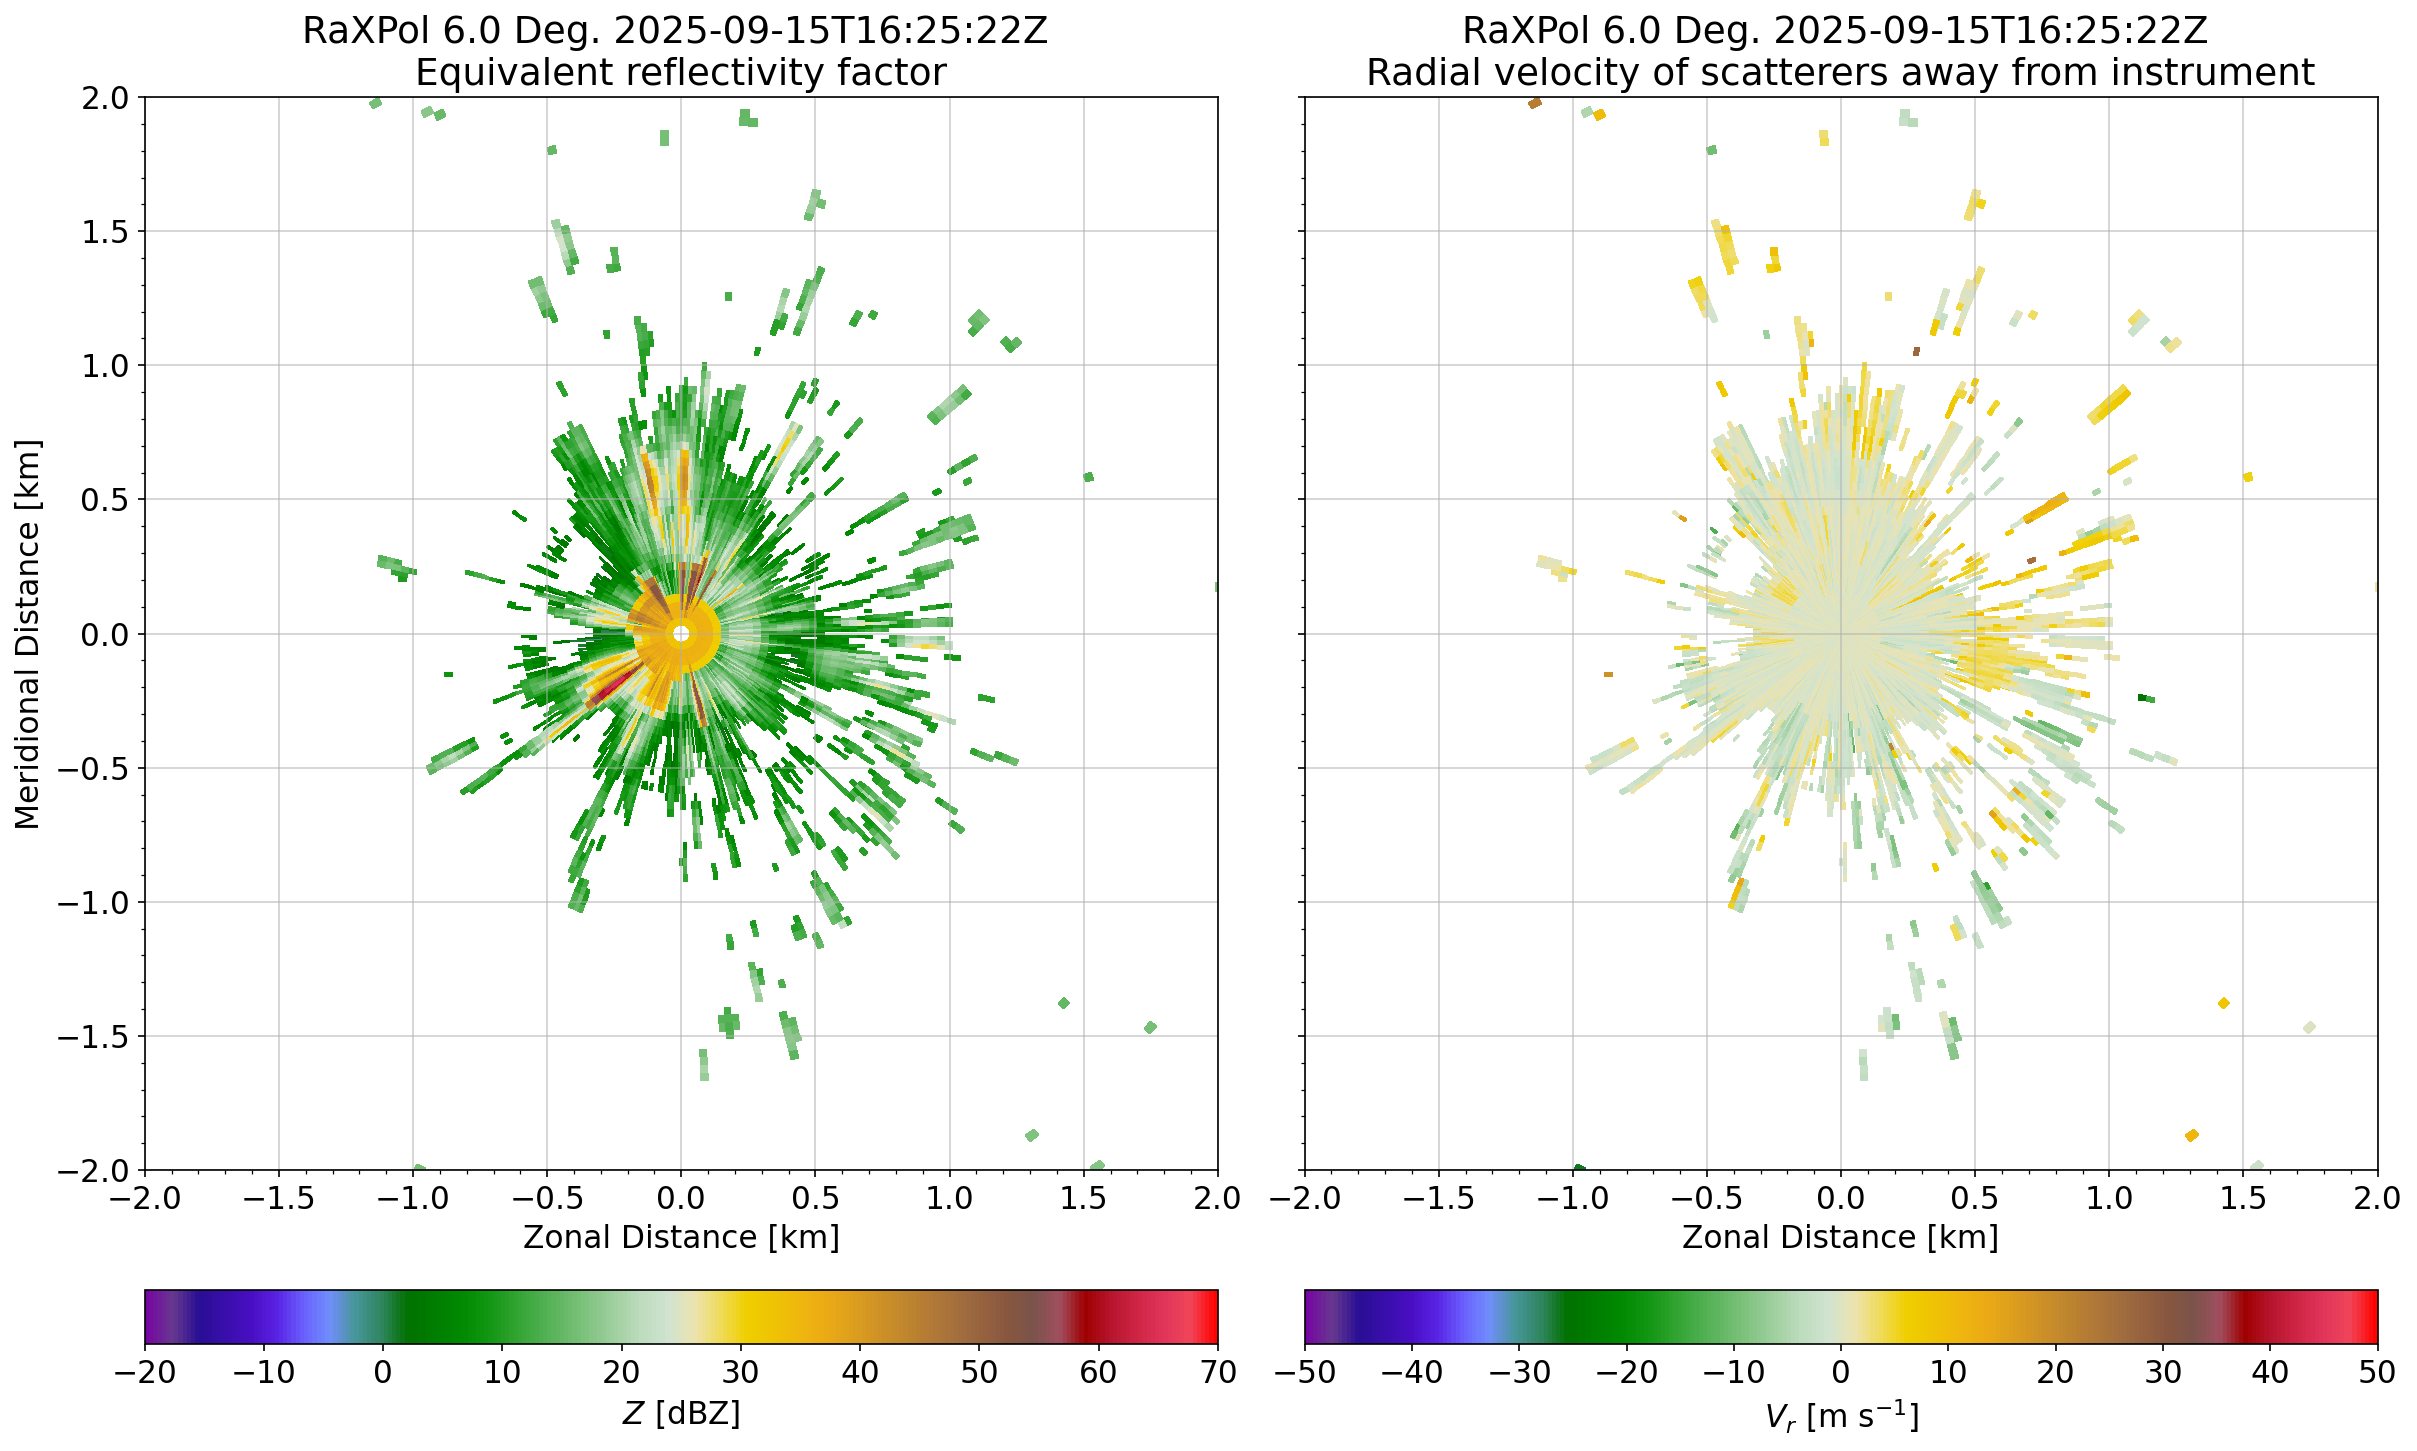

In [79]:
swp = 0
# make figure
display = pyart.graph.RadarDisplay(radar.extract_sweeps([swp]))
fig, axs = plt.subplots(figsize=(16,10), 
                        ncols=2, nrows=1,
                        sharey=True, sharex=True,
                        constrained_layout=True,
                        dpi=150)
# reflectivity
ax = axs[0]
vmin, vmax = -20, 70
display.plot_ppi('DBZ', ax=ax, 
                vmin=vmin, vmax=vmax,
                cmap="Carbone42",
                colorbar_flag=False,
                title_use_sweep_time=True,
                axislabels_flag=False)
cbar0 = fig.colorbar(display.plots[0], ax=ax, orientation='horizontal', pad=0.025)
cbar0.set_label("$Z$ [dBZ]")
cbar0.set_ticks(np.arange(vmin, vmax + 0.001, 10))
ax.set_ylabel("Meridional Distance [km]")
# radial velocity
ax = axs[1]
vmin, vmax = -50, 50
display.plot_ppi('VEL', ax=ax, 
                vmin=vmin, vmax=vmax,
                cmap="Carbone42",
                colorbar_flag=False,
                title_use_sweep_time=True,
                axislabels_flag=False)
cbar1 = fig.colorbar(display.plots[1], ax=ax, orientation='horizontal', pad=0.025)
cbar1.set_label("$V_r$ [m s$^{-1}$]")
cbar1.set_ticks(np.arange(vmin, vmax + 0.001, 10))
# clean up plot
for iax in axs.flatten():
    iax.set_aspect('equal')
    iax.set_xlim(-2.,2.)
    iax.xaxis.set_major_locator(MultipleLocator(0.5))
    iax.xaxis.set_minor_locator(MultipleLocator(0.1))
    iax.set_xlabel("Zonal Distance [km]")
    iax.set_ylim(-2.,2.)
    iax.yaxis.set_major_locator(MultipleLocator(0.5))
    iax.yaxis.set_minor_locator(MultipleLocator(0.1))
    iax.grid(alpha=0.6)